In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised_Categorical\\Files\\SMSSpamCollection.csv")
df=df.sample(frac=1,random_state=3)

In [4]:
df.head()

,Class,sms
2632,spam,"URGENT! Your mobile No 077xxx WON a £2,000 Bon..."
454,ham,Ok i will tell her to stay out. Yeah its been ...
983,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
1282,ham,Am I the only one who doesn't stalk profiles?
4610,ham,Y de asking like this.


In [5]:
df['Class']=df['Class'].map({'spam':1,'ham':0})

In [6]:

df

,Class,sms
2632,1,"URGENT! Your mobile No 077xxx WON a £2,000 Bon..."
454,0,Ok i will tell her to stay out. Yeah its been ...
983,1,Congrats! 2 mobile 3G Videophones R yours. cal...
1282,0,Am I the only one who doesn't stalk profiles?
4610,0,Y de asking like this.
...,...,...
789,1,"5 Free Top Polyphonic Tones call 087018728737,..."
968,0,What do u want when i come back?.a beautiful n...
1667,0,Guess who spent all last night phasing in and ...
3321,0,Eh sorry leh... I din c ur msg. Not sad alread...


In [7]:
y=df['Class']
X=df['sms']

In [8]:
X

2632    URGENT! Your mobile No 077xxx WON a £2,000 Bon...
454     Ok i will tell her to stay out. Yeah its been ...
983     Congrats! 2 mobile 3G Videophones R yours. cal...
1282        Am I the only one who doesn't stalk profiles?
4610                               Y de asking like this.
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: sms, Length: 5572, dtype: object

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [10]:
# Drops basic english words like and the for are
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [11]:
vect.fit(X_train)
X_traint=vect.transform(X_train)
X_testt=vect.transform(X_test)

In [12]:
X_traint.shape

(3900, 6855)

In [13]:
vect.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07808',
 '07808247860',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002986030',
 '08002986906',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08701213186',
 '08701237397',
 '08701417012

In [14]:
#these words are skipped 
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [15]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve


Confusion matrix-Train 
 [[3358   12]
 [   7  523]]
Overall Accuracy -Train 0.9951282051282051
AUC - Train 0.9983645932478585
TEST
Confusion matrix-Test 
 [[1442   13]
 [  15  202]]
Overall Accuracy -Test 0.9832535885167464
AUC - Test 0.985506833262071


Text(0, 0.5, 'TPR')

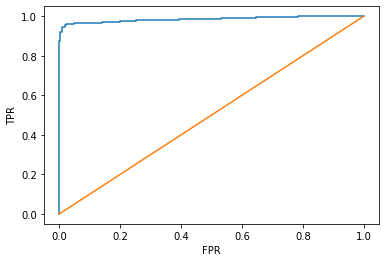

In [16]:
mnb.fit(X_traint,y_train)

    #Train
ytrain_predict=mnb.predict(X_traint)
ytrain_prob=mnb.predict_proba(X_traint)[:,-1]
ytrain_predict
print('Confusion matrix-Train','\n',confusion_matrix(y_train,ytrain_predict))
print('Overall Accuracy -Train',accuracy_score(y_train,ytrain_predict))
print('AUC - Train',roc_auc_score(y_train,ytrain_prob))
    
print("TEST")
    #test
ytest_pred=mnb.predict(X_testt)
ytest_prob=mnb.predict_proba(X_testt)[:,-1]
print('Confusion matrix-Test','\n',confusion_matrix(y_test,ytest_pred))
print('Overall Accuracy -Test',accuracy_score(y_test,ytest_pred))
print('AUC - Test',roc_auc_score(y_test,ytest_prob))

#plot
fpr,tpr,thresholds=roc_curve(y_test,ytest_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')